![image](images/um_logo.png)

# Computación II


# ***Threads***

## ***Mecanismos de sincronización***

En el contexto de la programación concurrente con hilos, los mecanismos de sincronización son herramientas que se utilizan para coordinar y controlar el acceso a recursos compartidos entre múltiples hilos. Estos mecanismos permiten que los hilos se comuniquen y se sincronicen entre sí, evitando condiciones de carrera y garantizando la consistencia y la integridad de los datos.

Algunos de los mecanismos de sincronización más comunes son:

+ Bloqueo (Lock): Un bloqueo es un mecanismo que permite que un solo hilo acceda a un recurso o sección crítica a la vez. Cuando un hilo adquiere un bloqueo, los demás hilos que intentan adquirirlo deben esperar hasta que el bloqueo se libere.

+ Semáforo (Semaphore): Un semáforo es un contador que controla el acceso a un número limitado de recursos. Permite que varios hilos accedan a un recurso al mismo tiempo, siempre que el número total de hilos no supere el límite especificado por el semáforo.

+ Barrera (Barrier): Una barrera es un punto de sincronización en el cual los hilos deben esperar hasta que todos los hilos hayan alcanzado dicho punto antes de poder continuar. Se utiliza para asegurar que ciertas tareas o cálculos se completen antes de que los hilos puedan avanzar.

+ Variable de condición (Condition): Una condición permite que los hilos esperen hasta que se cumpla una determinada condición antes de continuar su ejecución. Los hilos pueden esperar en una condición hasta que otro hilo los notifique o hasta que se cumpla una condición específica.

+ Eventos

+ Temporizadores

Cada mecanismo tiene sus propias características y aplicaciones, y es importante comprenderlos correctamente y utilizarlos de manera adecuada para evitar problemas de concurrencia.

### ***Lock***
La primitiva __Lock__ es un mecanismo de sincronización que no pertenece a un hilo en particular cuando está bloqueada. En Python, es actualmente el mecanismo de sincronización de nivel más bajo disponible y se implementa directamente mediante el módulo de extensión _thread.
Lock puede estar en uno de dos estados: "bloqueado" o "desbloqueado". Se crea en el estado desbloqueado. Tiene dos métodos básicos: __acquire()__ (adquirir) y __release()__ (liberar). Cuando el estado está desbloqueado, la llamada a acquire() cambia el estado a bloqueado y retorna inmediatamente. Cuando el estado está bloqueado, la llamada a __acquire()__ se bloquea hasta que otra llamada a __release()__ en otro hilo cambie el estado a desbloqueado. En ese momento, la llamada a __acquire()__ restablece el estado a bloqueado y retorna. El método __release()__ solo debe ser llamado cuando el bloqueo está en estado bloqueado; cambia el estado a desbloqueado y retorna inmediatamente. Si se intenta liberar un bloqueo desbloqueado, se generará una excepción RuntimeError.
Los bloqueos también admiten el protocolo de gestión de contexto.
Cuando más de un hilo está bloqueado en la llamada a __acquire()__, esperando que el estado cambie a desbloqueado, solo uno de los hilos procederá cuando se llame a __release()__ y se cambie el estado a desbloqueado. No está definido qué hilo de los que están esperando procederá y esto puede variar en diferentes implementaciones.
Todas las operaciones de los métodos se ejecutan de forma atómica.

In [27]:
import threading
import time
import random

# Creamos una instancia de Lock
lock = threading.Lock()

# Variable compartida entre hilos
text = ''

# Función que incrementa el contador de forma segura
def complete_text():
    global text
    # Bloqueamos el acceso al contador
    lock.acquire()
    try:
        print(threading.current_thread())
        # Sección crítica: incrementamos el contador
        for l in threading.current_thread().name:
            text += l
            time.sleep(random.randint(0, 1)/100)
        text += '\n'
    finally:
        # Liberamos el bloqueo
        lock.release()
        pass

# Creamos varios hilos que incrementan el contador
threads = []
for _ in range(5):
    t = threading.Thread(target=complete_text)
    threads.append(t)
    t.start()

# Esperamos a que todos los hilos terminen
for t in threads:
    t.join()

# Imprimimos el resultado final
print("Text:\n", text)


<Thread(Thread-130 (complete_text), started 139804339598912)>
<Thread(Thread-131 (complete_text), started 139803767076416)>
<Thread(Thread-132 (complete_text), started 139803750291008)>
<Thread(Thread-133 (complete_text), started 139803741898304)>
<Thread(Thread-134 (complete_text), started 139804289087040)>
Text:
 Thread-130 (complete_text)
Thread-131 (complete_text)
Thread-132 (complete_text)
Thread-133 (complete_text)
Thread-134 (complete_text)



Soy el hilo  John y he realizado la tarea.
Soy el hilo  Alan y he realizado la tarea.
El resultado es: 1.0


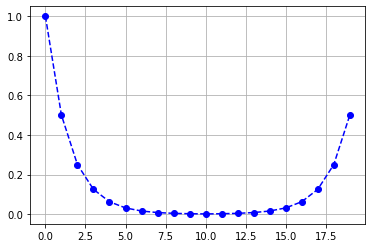

In [92]:
import threading
import time
import random
import matplotlib.pyplot as plt

x = 1
lock = threading.Lock()
path = []

def forward():
    global x
    flag = False
    lock.acquire()
    for i in range(10):
        flag = True
        time.sleep(random.randint(0, 1)/100) #Simula una tarea
        path.append(x)
        
        x *= 2
        
    if flag:
        print('Soy el hilo ', threading.current_thread().name, 'y he realizado la tarea.')
    else:
        print('Soy el hilo ', threading.current_thread().name, 'y esta vez no me tocó hacer nada...')
    lock.release()
    
def backward():
    global x
    flag = False
    lock.acquire()
    for i in range(10):
        flag = True
        time.sleep(random.randint(0, 1)/100) #Simula una tarea
        path.append(x)
        
        x /= 2
        
    if flag:
        print('Soy el hilo ', threading.current_thread().name, 'y he realizado la tarea.')
    else:
        print('Soy el hilo ', threading.current_thread().name, 'y esta vez no me tocó hacer nada...')
    lock.release()



# Crear dos hilos que calculen el problema
thread1 = threading.Thread(target=forward, name='Alan')
thread2 = threading.Thread(target=backward, name='John')

# Iniciar los hilos
thread2.start()
thread1.start()


# Esperar a que los hilos terminen
thread1.join()
thread2.join()

# Imprimir el valor final del contador
print("El resultado es:", x)

plt.plot(range(len(path)), path, '--bo')
plt.grid(True)
plt.show()


### ***Semaphore***
Los semáforos son un mecanismo de sincronización fundamental en la ciencia de la computación, y fueron inventados por el reconocido científico de la computación Edsger W. Dijkstra. Aunque originalmente se les denominaba P() y V(), en Python se utilizan los métodos acquire() y release() respectivamente.

Un semáforo gestiona un contador interno que se decrementa con cada llamada a acquire() y se incrementa con cada llamada a release(). El valor del contador nunca puede ser menor que cero. Cuando un hilo realiza una llamada a acquire() y encuentra que el contador es cero, se bloquea, esperando a que otro hilo realice una llamada a release() y aumente el contador.

Una de las características importantes de los semáforos es que también admiten el protocolo de manejo de contexto en Python. Esto significa que se pueden utilizar en un bloque with statement, lo que garantiza que se realice automáticamente la liberación del semáforo al finalizar el bloque, incluso en caso de excepciones. Esto ayuda a prevenir problemas de bloqueo accidental y asegura una liberación adecuada de recursos.

Además, los semáforos son flexibles y se pueden utilizar en diferentes situaciones de programación concurrente para coordinar y controlar el acceso a recursos compartidos. Proporcionan una forma eficiente de gestionar la concurrencia y evitar condiciones de carrera y conflictos.

In [1]:
import threading
import time


# Crear un semáforo con un contador inicial. Cambiar el contador para ver los distintos resultados.
semaphore = threading.Semaphore(1)

def worker():
    # Adquirir el semáforo
    semaphore.acquire()
    try:
        # Realizar alguna tarea crítica
        time.sleep(2)
        print("Realizando tarea crítica ")
    finally:
        # Liberar el semáforo
        semaphore.release()
#         semaphore.release()
#         semaphore.release()
#         semaphore.release()
#         semaphore.release()
#         semaphore.release()
#         semaphore.release()

# Crear varios hilos que ejecutan la función worker
threads = []
for _ in range(5):
    t = threading.Thread(target=worker)
    threads.append(t)
    t.start()

# Esperar a que todos los hilos terminen
for t in threads:
    t.join()


Realizando tarea crítica 
Realizando tarea crítica 
Realizando tarea crítica 
Realizando tarea crítica 
Realizando tarea crítica 


#### Bounded Semaphore
Los BoundedSemaphore son una variante de los semáforos ordinarios que imponen un límite superior en la cantidad de "permisos" disponibles. A diferencia de los semáforos ordinarios, donde el contador puede crecer indefinidamente mediante llamadas sucesivas a release(), un BoundedSemaphore limita el contador a un valor máximo predefinido.

La principal diferencia entre un BoundedSemaphore y un semáforo ordinario radica en el comportamiento de la función release(). Cuando se llama a release() en un semáforo ordinario, el contador aumenta en uno, lo que permite que otro hilo adquiera el semáforo. Sin embargo, en un BoundedSemaphore, si el contador ya alcanzó el valor máximo permitido, la llamada a release() no incrementa el contador y simplemente se ignora.

Esto significa que un BoundedSemaphore es útil cuando se necesita limitar la cantidad máxima de permisos disponibles. Puede ser utilizado para controlar el acceso a un recurso compartido o para limitar la cantidad de hilos que pueden realizar ciertas operaciones simultáneamente.

In [5]:
import threading
import time

# Crear un BoundedSemaphore con un límite de 3 permisos
semaphore = threading.BoundedSemaphore(3)

def worker():
    # Adquirir el semáforo
    semaphore.acquire()
    try:
        # Realizar alguna tarea crítica
        time.sleep(2)
        print("Realizando tarea crítica")
    finally:
        # Liberar el semáforo
        semaphore.release()
        semaphore.release()
        semaphore.release()
        semaphore.release()
#         semaphore.release()
#         semaphore.release()
#         semaphore.release()

# Crear varios hilos que ejecutan la función worker
threads = []
for _ in range(7):
    t = threading.Thread(target=worker)
    threads.append(t)
    t.start()

# Esperar a que todos los hilos terminen
for t in threads:
    t.join()


Exception in thread Exception in thread Thread-32 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-33 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Thread-31 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_6000/3767483672.py", line 19, in worker
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_6000/3767483672.py", line 16, in worker
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_6000/3767483672.py", line 16, in worker
 

Realizando tarea crítica
Realizando tarea crítica
Realizando tarea crítica


Exception in thread Thread-35 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-34 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-36 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_6000/3767483672.py", line 19, in worker
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_6000/3767483672.py", line 16, in worker
  File "/usr/lib/python3.10/threading.py", line 528, in release
    raise ValueError("Semaphore released too m

Realizando tarea críticaRealizando tarea crítica

Realizando tarea crítica


Exception in thread Thread-37 (worker):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_6000/3767483672.py", line 16, in worker
  File "/usr/lib/python3.10/threading.py", line 528, in release
    raise ValueError("Semaphore released too many times")
ValueError: Semaphore released too many times


Realizando tarea crítica


### ***Barrier***
Las Barrier proporcionan una primitiva de sincronización simple para un número fijo de hilos que necesitan esperarse mutuamente. Cada uno de los hilos intenta pasar la barrera llamando al método wait() y quedará bloqueado hasta que todos los hilos hayan realizado sus llamadas a wait(). En este punto, los hilos son liberados simultáneamente.

Las Barrier pueden ser reutilizadas cualquier cantidad de veces para el mismo número de hilos. Esto significa que una vez que los hilos han pasado la barrera y han sido liberados, la Barrier puede ser reiniciada y utilizada nuevamente para sincronizar el mismo número de hilos en futuras iteraciones o tareas.

Además, es importante destacar que las Barrier proporcionan un punto de sincronización donde los hilos pueden coordinar su progreso y asegurarse de que todos hayan alcanzado cierto punto antes de continuar con la ejecución. Esto es especialmente útil en situaciones donde se requiere una sincronización en etapas específicas de un algoritmo o proceso.

Un ejemplo de uso común de la Barrier es en aplicaciones donde se necesita realizar un cálculo paralelo distribuido en múltiples hilos y se requiere que todos los hilos completen ciertas tareas antes de pasar a la siguiente etapa del cálculo. Las Barrier se convierten en un punto de sincronización donde cada hilo espera a que todos los demás hayan terminado su trabajo antes de continuar.

In [10]:
import threading
import time
import random

# Crear una Barrier para 4 hilos
barrier = threading.Barrier(4)

def worker():
    # Realizar alguna tarea antes de la barrera
    print("Tarea antes de la barrera. Hilo: ", threading.current_thread().name + '\n')
    time.sleep(random.randint(0, 1))
    # Esperar a que todos los hilos lleguen a la barrera
    barrier.wait()

    # Realizar alguna tarea después de la barrera
    print("Tarea después de la barrera. Hilo: ", threading.current_thread().name + '\n')

# Crear los hilos que ejecutan la función worker
threads = []
for _ in range(4):
    t = threading.Thread(target=worker)
    threads.append(t)
    t.start()

# Esperar a que todos los hilos terminen
for t in threads:
    t.join()

Tarea antes de la barrera. Hilo:  Thread-54 (worker)

Tarea antes de la barrera. Hilo:  Thread-55 (worker)

Tarea antes de la barrera. Hilo:  Thread-56 (worker)

Tarea antes de la barrera. Hilo:  Thread-57 (worker)

Tarea después de la barrera. Hilo:  Thread-57 (worker)

Tarea después de la barrera. Hilo:  Thread-54 (worker)

Tarea después de la barrera. Hilo:  Thread-55 (worker)

Tarea después de la barrera. Hilo:  Thread-56 (worker)



### ***Condition***
Una condición variable está siempre asociada a algún tipo de bloqueo; este puede ser pasado como argumento o se creará uno por defecto. Pasar un bloqueo como argumento es útil cuando varias variables de condición deben compartir el mismo bloqueo. El bloqueo forma parte del objeto de la condición: no es necesario hacer un seguimiento por separado.

Una variable de condición cumple con el protocolo de gestión de contexto: al utilizar la declaración with, se adquiere el bloqueo asociado durante la duración del bloque incluido. Los métodos **acquire()** y **release()** también llaman a los métodos correspondientes del bloqueo asociado.

Los demás métodos deben ser llamados con el bloqueo asociado en posesión. El método **wait()** libera el bloqueo y luego se bloquea hasta que otro hilo lo despierte llamando a **notify()** o **notify_all()**. Una vez que se despierta, **wait()** vuelve a adquirir el bloqueo y retorna. También es posible especificar un tiempo de espera.

El método **notify()** despierta a uno de los hilos que están esperando a la variable de condición, si hay alguno esperando. El método **notify_all()** despierta a todos los hilos que están esperando a la variable de condición.

Nota: los métodos **notify()** y **notify_all()** no liberan el **Lock**; esto significa que el hilo o hilos despertados no retornarán de su llamada a **wait()** inmediatamente, sino solo cuando el hilo que llamó a **notify()** o **notify_all()** finalmente renuncie a la propiedad del bloqueo.

El estilo de programación típico que utiliza variables de condición utiliza el bloqueo para sincronizar el acceso a algún estado compartido; los hilos interesados en un cambio particular de estado llaman a **wait()** repetidamente hasta que ven el estado deseado, mientras que los hilos que modifican el estado llaman a **notify()** o **notify_all()** cuando cambian el estado de tal manera que podría ser un estado deseado para uno de los hilos en espera.

In [21]:
import threading, random
import numpy as np

def consumer(condition):
    global buffer
    print(threading.current_thread().name, 'Esperando a que finalice el cálculo... ')
    with condition:
        condition.wait()
        print('Elementos:', len(buffer))
        b = np.asarray(buffer)
        print('Suma de los cuadrados:', np.sum(b**2))

def producer(condition):
    global buffer
    print(threading.current_thread().name, 'Generando números... ')
    with condition:
        while len(buffer) <= 100:
            n = random.randint(1, 100)
            if n %2:
                buffer.append(n)
                
        print('Números impares generados')
        condition.notify_all()
     
buffer = []
condition = threading.Condition()
thread1 = threading.Thread(name='hilo1', target=consumer, args=(condition,))                      
thread2 = threading.Thread(name='hilo2', target=producer, args=(condition,))

thread1.start()
thread2.start()

hilo1 Esperando a que finalice el cálculo... 
hilo2 Generando números... 
Números impares generados
Elementos: 101
Suma de los cuadrados: 314965


### ***Event***
El objeto de evento es un mecanismo básico de comunicación entre hilos en Python, donde un hilo señala un evento y otro hilo espera a que ocurra ese evento.

Un objeto de evento tiene una marca interna que puede ser establecida como verdadera mediante el método **set()** y restablecida a falsa mediante el método **clear()**. Cuando un hilo llama al método **wait()**, este se bloquea hasta que la marca sea verdadera.

El objeto de evento también puede ser utilizado con un timeout opcional en el método **wait()**, lo que permite que el hilo espere un tiempo determinado antes de continuar la ejecución.

Además, el objeto de evento puede ser utilizado en conjunto con otros mecanismos de sincronización, como bloqueos y colas, para construir estructuras de programación más complejas.

Es importante tener en cuenta que el objeto de evento solo permite la comunicación entre dos hilos, donde uno señala el evento y otro lo espera. Si se necesita una comunicación más compleja o una coordinación entre múltiples hilos, pueden ser necesarios otros mecanismos de sincronización más avanzados, como semáforos o barreras.

El objeto de evento es una herramienta poderosa para controlar la sincronización entre hilos y asegurar que los hilos se ejecuten en el orden deseado y esperen por eventos específicos antes de continuar su ejecución.

In [24]:
import threading, random

# Creamos el objeto de evento
event = threading.Event()

# Definimos una función que espera al evento
def wait_for_event():
    print("Esperando al evento...")
    event.wait()
    print("¡El evento ha ocurrido!")

# Definimos una función que desencadena el evento
def trigger_event():
    while True:
        n = random.randint(0, 100)
        print(n)
        if n == 0:
            event.set()
            break

# Creamos los hilos para esperar y desencadenar el evento
wait_thread = threading.Thread(target=wait_for_event)
trigger_thread = threading.Thread(target=trigger_event)

# Iniciamos los hilos
wait_thread.start()
trigger_thread.start()

# Esperamos a que los hilos terminen
wait_thread.join()
trigger_thread.join()

print("Programa finalizado")


Esperando al evento...
10
86
68
53
5
36
56
90
83
88
74
78
93
100
21
100
18
46
35
24
46
65
44
7
16
34
100
32
64
38
30
41
86
58
33
78
57
45
2
66
80
8
61
30
97
80
10
0
¡El evento ha ocurrido!
Programa finalizado


### ***Timer***
La clase Timer del módulo threading de Python representa una acción que se ejecutará después de que haya transcurrido un cierto período de tiempo, actuando como un temporizador. Timer es una subclase de Thread, lo que permite crear y gestionar hilos personalizados.

Para utilizar un Timer, se debe llamar al método **start()**, de manera similar a como se inician los hilos. Esto iniciará el temporizador y comenzará a contar el tiempo especificado. Si en algún momento se desea detener el temporizador antes de que se ejecute la acción programada, se puede llamar al método **cancel()**. Es importante tener en cuenta que el intervalo de tiempo que el temporizador esperará antes de ejecutar su acción puede no ser exactamente el mismo que el intervalo especificado por el usuario debido a factores como la carga del sistema y la precisión del temporizador.

Además de los métodos mencionados, la clase Timer proporciona otros métodos y atributos útiles. Por ejemplo, se puede utilizar el método **is_alive()** para verificar si el temporizador está en ejecución, y el método **join()** para esperar a que el temporizador finalice su ejecución.

Es relevante destacar que los temporizadores de la clase Timer utilizan hilos subyacentes para realizar el conteo del tiempo y ejecutar la acción programada. Esto implica que si se utilizan múltiples temporizadores al mismo tiempo, puede haber problemas de concurrencia. Es necesario tomar precauciones al acceder a recursos compartidos dentro de la acción del temporizador para evitar condiciones de carrera.


In [26]:
import threading

def print_message():
    print("¡Hola desde el temporizador!")

# Crear un temporizador que ejecute la función print_message después de 5 segundos
timer = threading.Timer(5, print_message)

# Iniciar el temporizador
timer.start()

# Realizar otras tareas mientras el temporizador está en ejecución
print("Realizando otras tareas...")

# Esperar a que el temporizador finalice su ejecución
timer.join()

# El programa continuará aquí después de que el temporizador haya terminado

print("Fin del programa")

Realizando otras tareas...
¡Hola desde el temporizador!
Fin del programa
